In [55]:
#1. Load the dataset

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from os import system
from IPython.display import Image

In [57]:
PD_df = pd.read_excel('parkinsons.xlsx')

In [58]:
PD_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [59]:
PD_df.shape

(195, 24)

In [60]:
PD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [61]:
#2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
#number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges 
#in the dataset. (2.5 points)

In [80]:
missing_values=PD_df.columns[PD_df.isnull().any()]
print(missing_values)
print("No missing values")

Index([], dtype='object')
No missing values


In [62]:
print("1) Looking at the name column, we can make out that lots of data is missing. S03,S09,S023 ... etc")
print("2) Dataset certainly suffers from class imbalance issue. 147 out of 195 records have parkinsons.\nSome scaling might have to be done")
print("3) Some columns look like high correlation columns. Will need to decide on which to drop")

1) Looking at the name column, we can make out that lots of data is missing. S03,S09,S023 ... etc
2) Dataset certainly suffers from class imbalance issue. 147 out of 195 records have parkinsons.
Some scaling might have to be done
3) Some columns look like high correlation columns. Will need to decide on which to drop


In [63]:
#3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic
#such as central values, spread, tails etc. What are your observations? (15 points)

In [64]:
PD_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [65]:
print("MDVP:Fhi(Hz) shows right-tailedness. Outliers are present. However can't eliminate them as these indicate PD")

MDVP:Fhi(Hz) shows right-tailedness. Outliers are present. However can't eliminate them as these indicate PD


In [66]:
columns=PD_df.columns
columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Plotting for column name


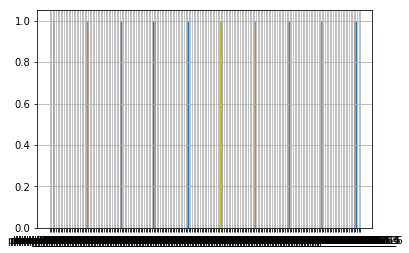

Plotting for column MDVP:Fo(Hz)


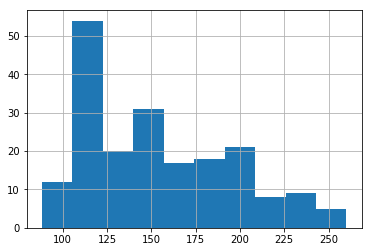

Plotting for column MDVP:Fhi(Hz)


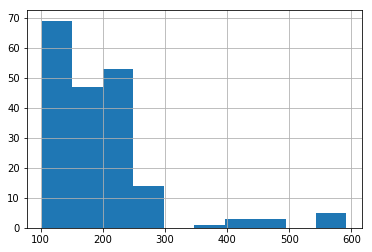

Plotting for column MDVP:Flo(Hz)


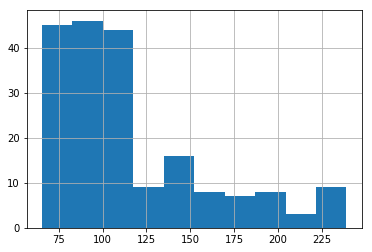

Plotting for column MDVP:Jitter(%)


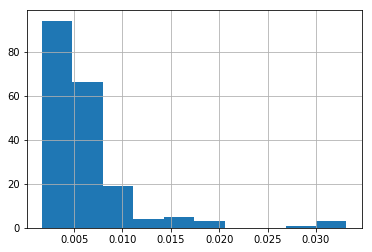

Plotting for column MDVP:Jitter(Abs)


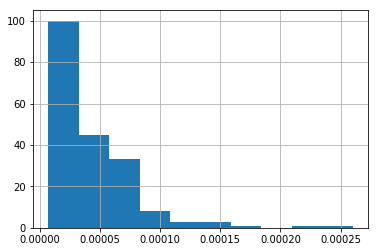

Plotting for column MDVP:RAP


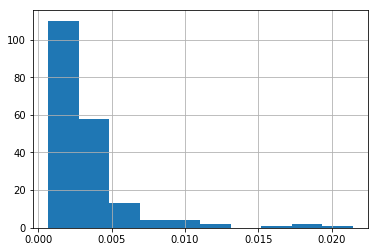

Plotting for column MDVP:PPQ


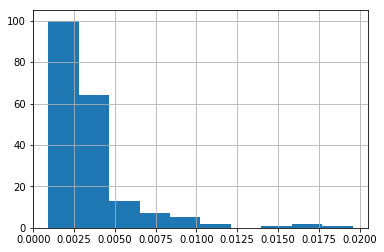

Plotting for column Jitter:DDP


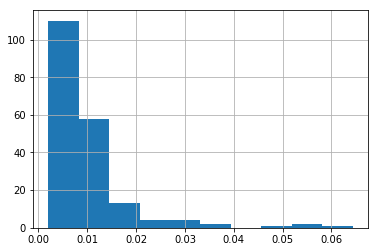

Plotting for column MDVP:Shimmer


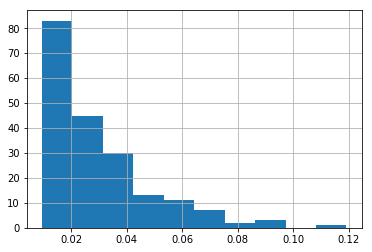

Plotting for column MDVP:Shimmer(dB)


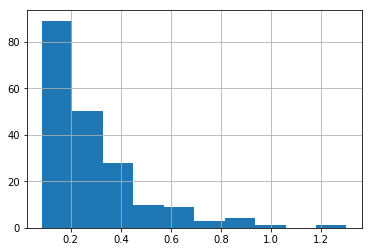

Plotting for column Shimmer:APQ3


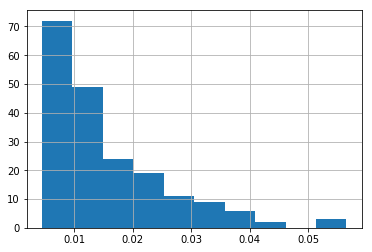

Plotting for column Shimmer:APQ5


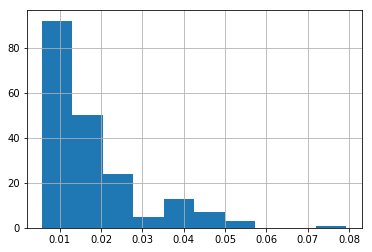

Plotting for column MDVP:APQ


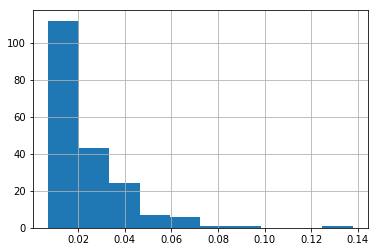

Plotting for column Shimmer:DDA


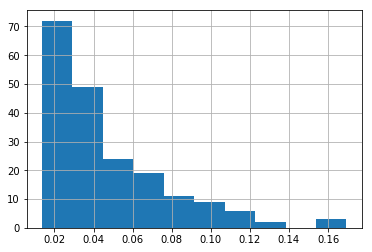

Plotting for column NHR


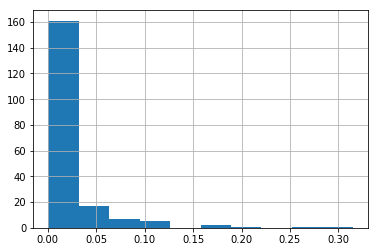

Plotting for column HNR


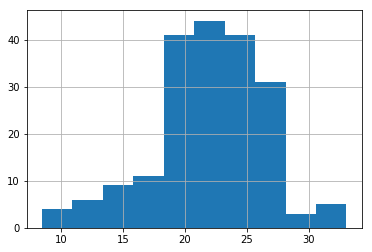

Plotting for column status


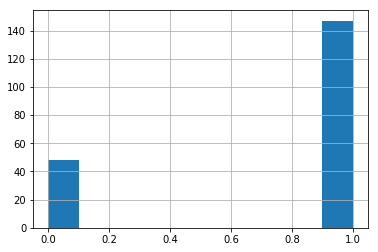

Plotting for column RPDE


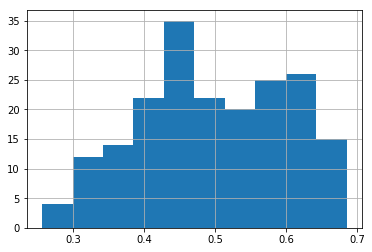

Plotting for column DFA


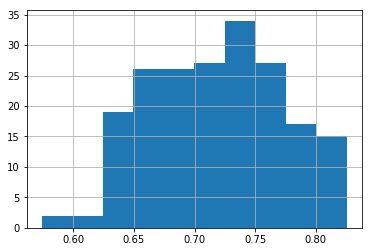

Plotting for column spread1


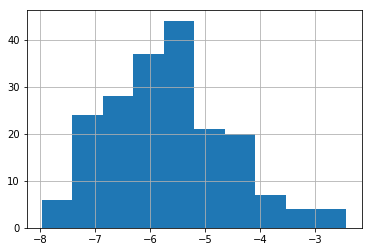

Plotting for column spread2


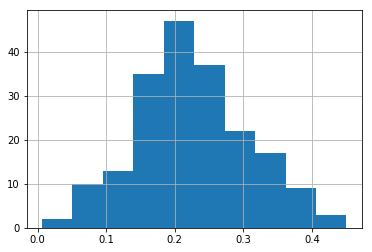

Plotting for column D2


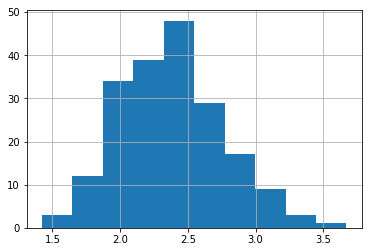

Plotting for column PPE


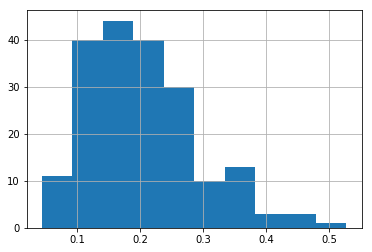

In [67]:
#PD_dfm=PD_df.melt(var_name='columns')
#g=sns.FacetGrid(PD_dfm,col='columns')
#g=(g.map(sns.distplot,'value'))

#df = pd.DataFrame(np.random.randn(14,5), columns=list("ABCDE"))

#fig, axes = plt.subplots(ncols=5)
#for ax, col in zip(axes, PD_df.columns):
#    sns.distplot(PD_df[col], ax=ax)

#g = sns.FacetGrid(PD_df.melt(), col="variable")
#g.map(sns.distplot, "value")
#plt.show()

for col in PD_df.columns:
    hist = PD_df[col].hist()
    print("Plotting for column {}".format(col))
    plt.show()

In [68]:
print("Observing quite a few columns with right-tailedness.\nHowever won't be able to \
eliminate outliers as they are significant in diagnosing outliers")

Observing quite a few columns with right-tailedness.
However won't be able to eliminate outliers as they are significant in diagnosing outliers


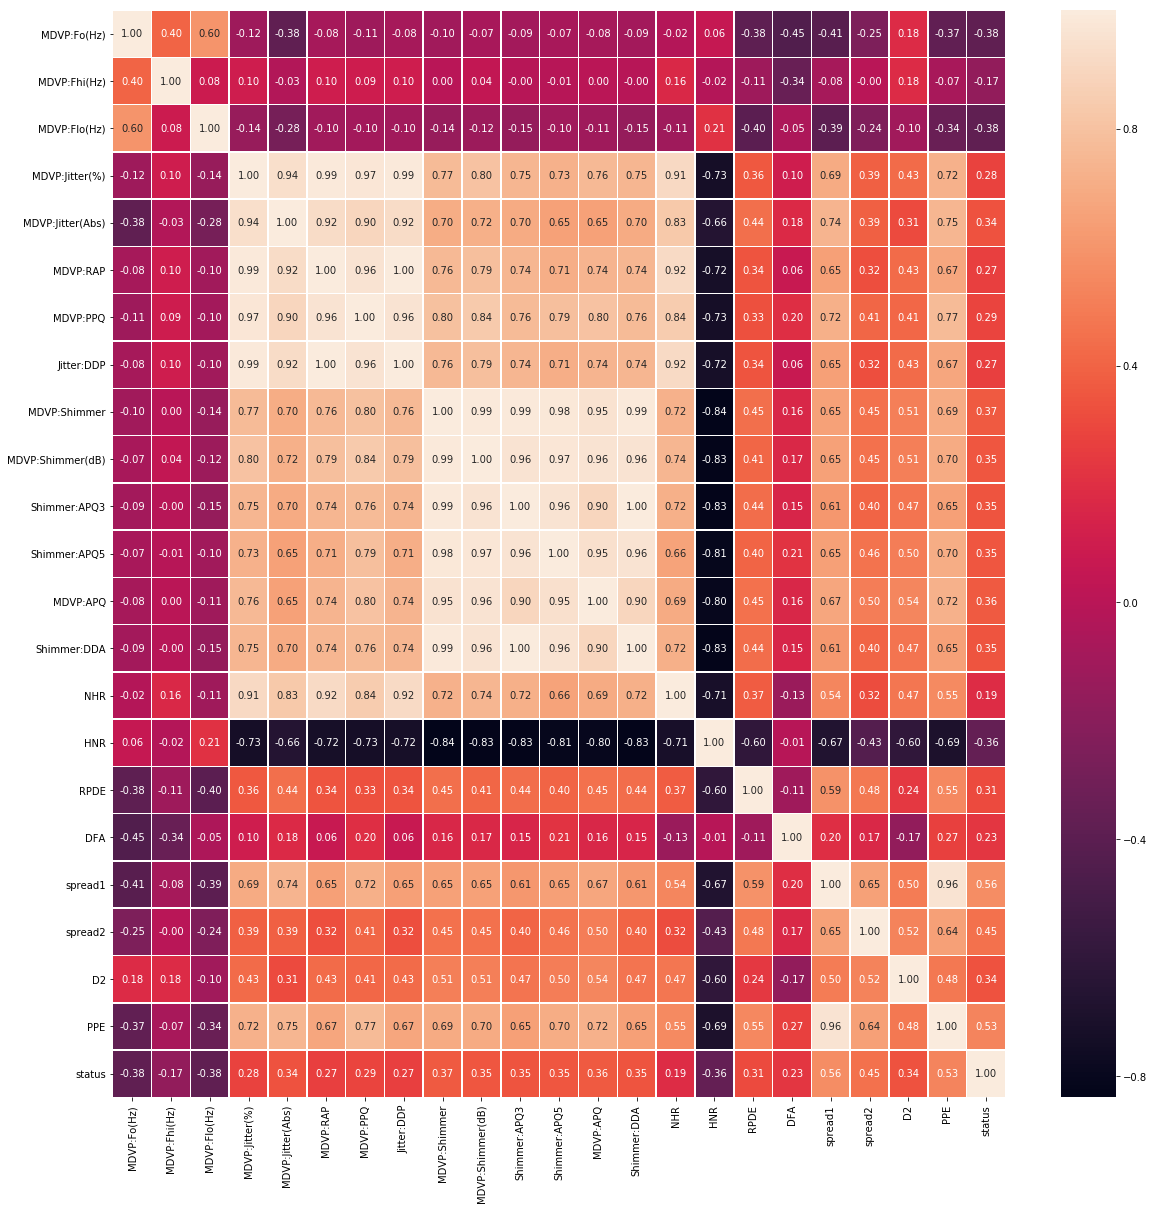

In [173]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr=PD_df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP',\
            'MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5'\
           ,'MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']].corr()
sns.heatmap(corr,annot=True,fmt='0.2f',linewidths=.5, ax=ax)

In [75]:
print("Unable to clearly visualize the heatmap. Will see corr values")

Unable to clearly visualize the heatmap. Will see corr values


In [70]:
PD_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


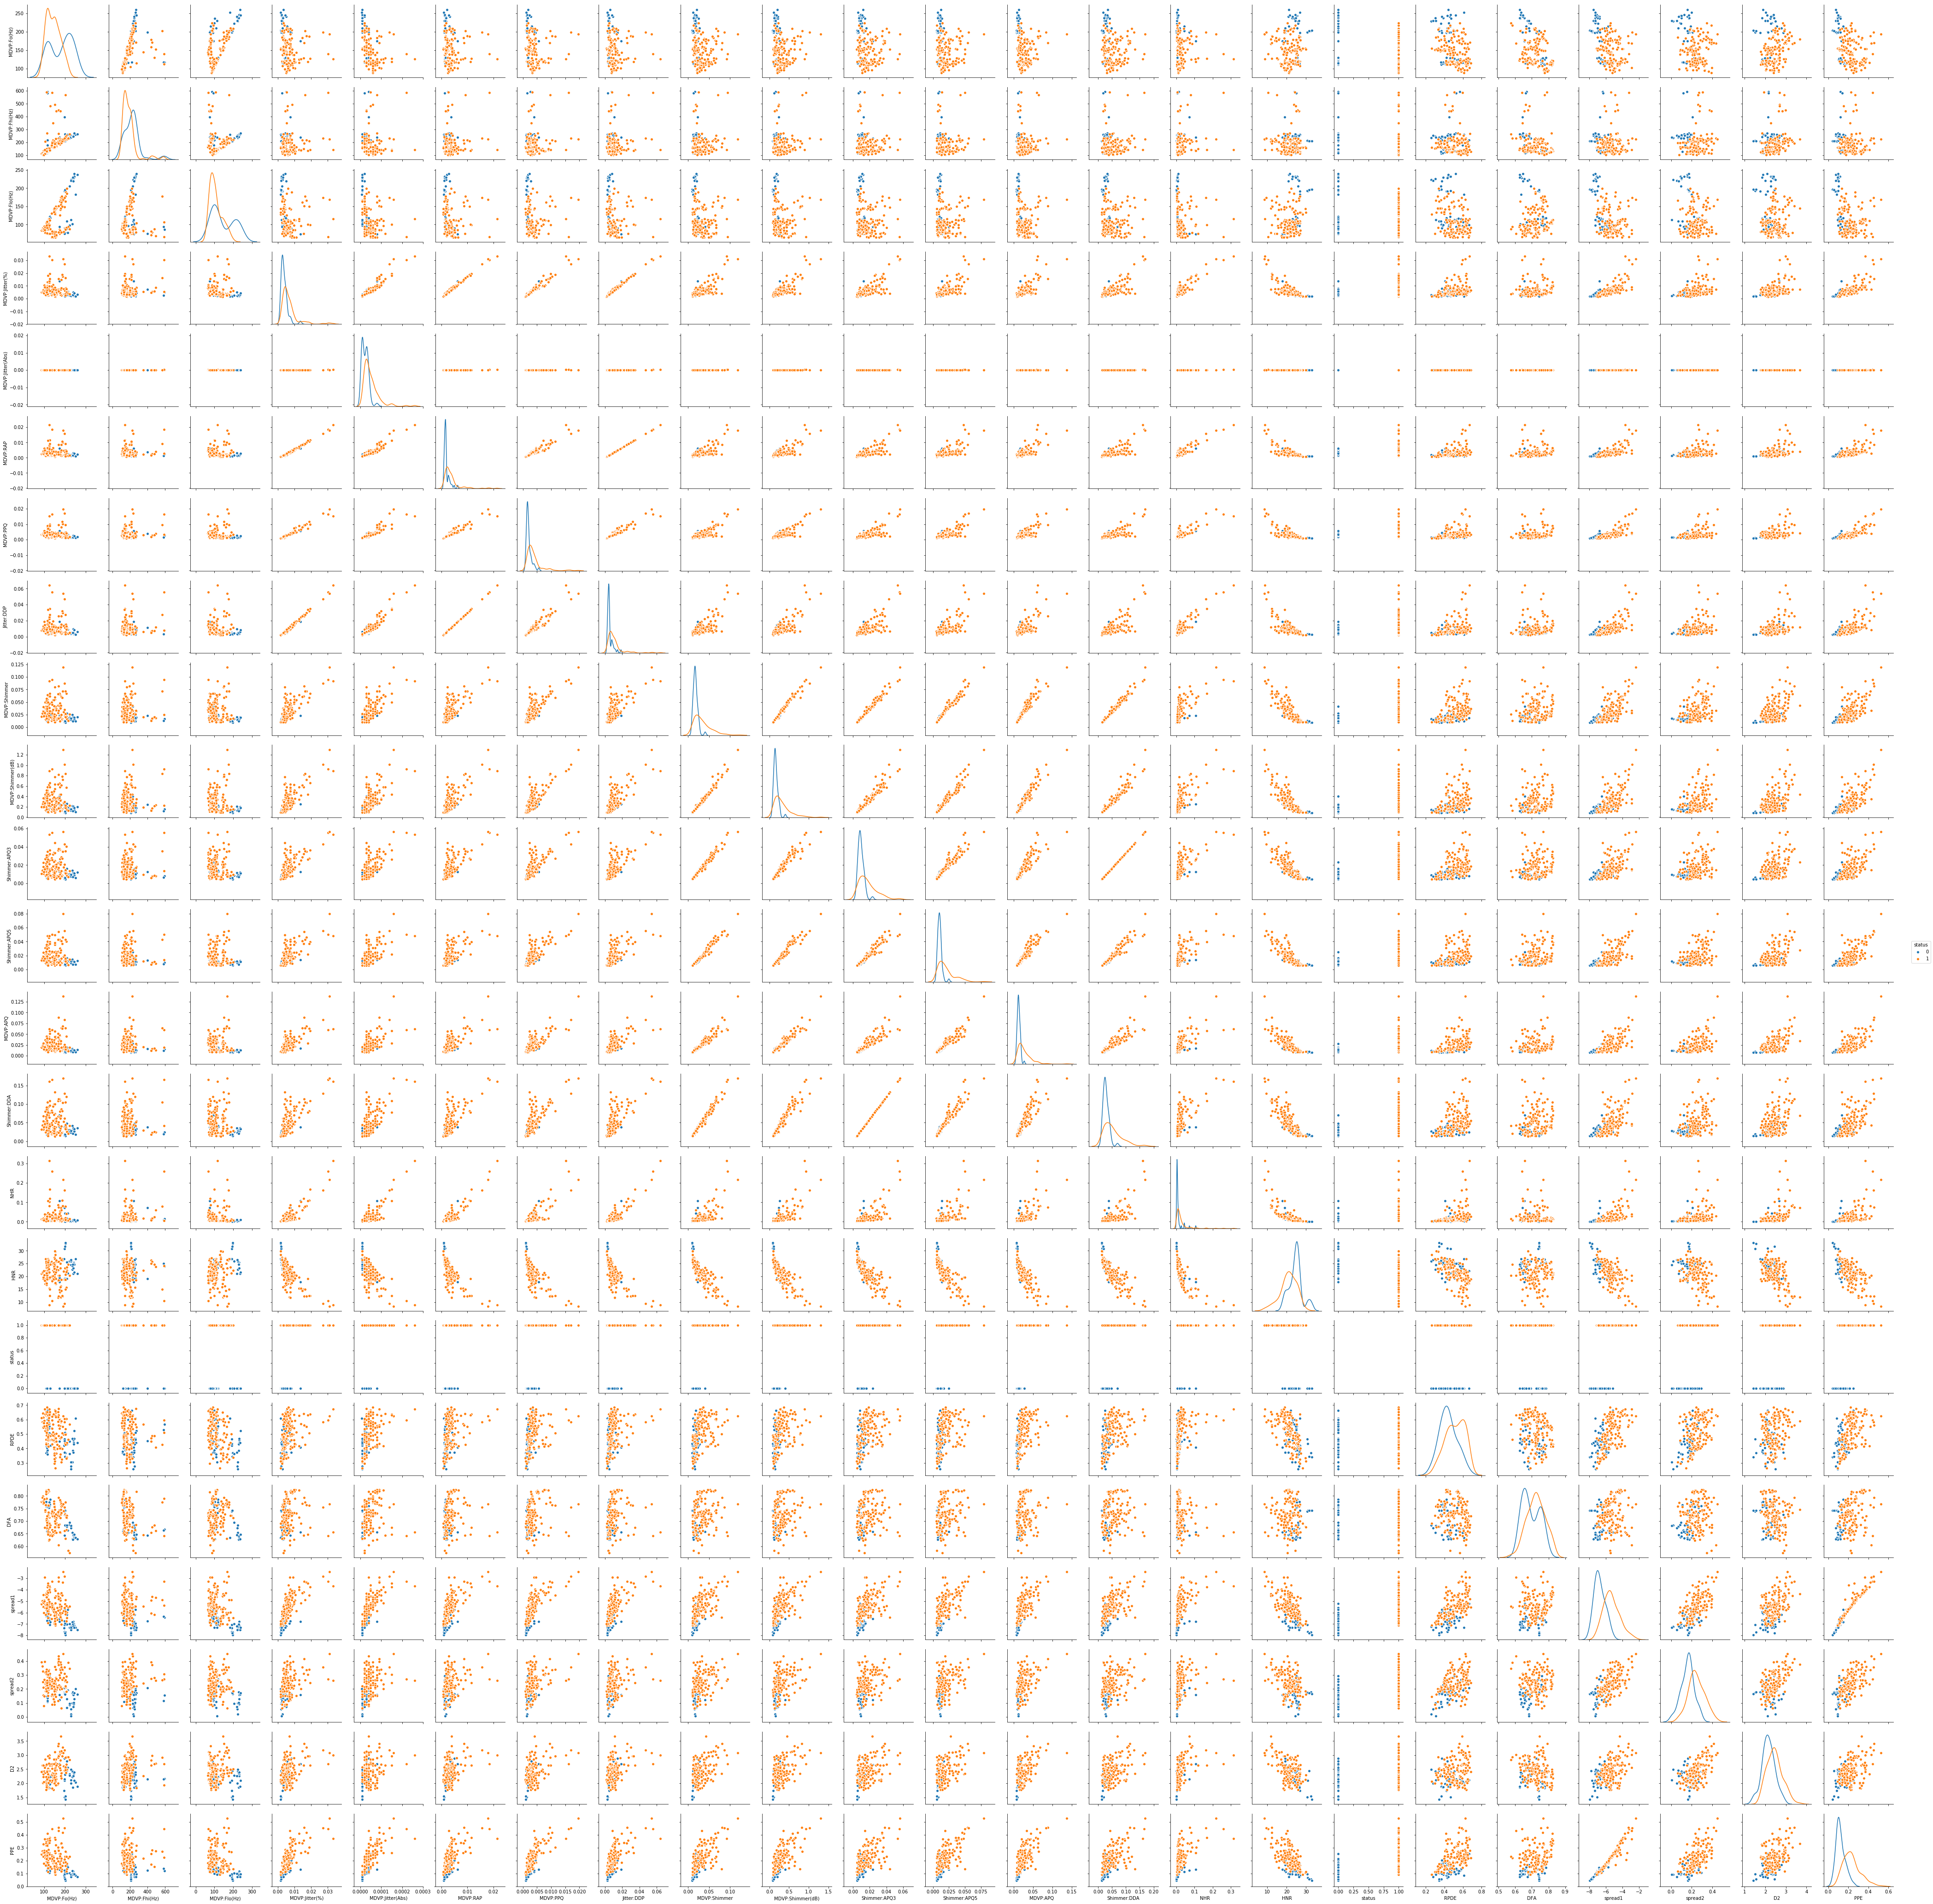

In [71]:
sns.pairplot(PD_df,hue='status',diag_kind='kde')

In [76]:
print("Lots of columns with very high correlation can be observed.")
print("Jitter % with Jitter abs and MDVP:RAP, MDVP:PPQ, Jitter:DDP. Will be dropping the Jitter % column")
print("Shimmer columns have high correlations among themselvs.Some should be dropped.\nHowever, due to lack of domain knowledge, unable to decide which ones")
print("MDVP:Shimmer has high correlation with most columns. Can be dropped")
print("Referring to http://www.fon.hum.uva.nl/praat/manual/Voice_3__Shimmer.html and https://www.sltinfo.com/acoustic-measures-norms/ for understanding shimmer")
print("From my understanding Shimmer:APQ3 can be dropped. APQ5 might give a better assessment.")
print("MDVP:Shimmer and Shimmer(db) are both taken into considerations with pathological thresholds.\nWouldn't want to drop any although they are highly correlated")
print("Observing higher impact of spread 1 and PPE on status")

Lots of columns with very high correlation can be observed.
Jitter % with Jitter abs and MDVP:RAP, MDVP:PPQ, Jitter:DDP. Will be dropping the Jitter % column
Shimmer columns have high correlations among themselvs.Some should be dropped.
However, due to lack of domain knowledge, unable to decide which ones
MDVP:Shimmer has high correlation with most columns. Can be dropped
Referring to http://www.fon.hum.uva.nl/praat/manual/Voice_3__Shimmer.html and https://www.sltinfo.com/acoustic-measures-norms/ for understanding shimmer
From my understanding Shimmer:APQ3 can be dropped. APQ5 might give a better assessment.
MDVP:Shimmer and Shimmer(db) are both taken into considerations with pathological thresholds.
Wouldn't want to drop any although they are highly correlated
Observing higher impact of spread 1 and PPE on status


In [90]:
PD_df_new=PD_df.drop(['name','MDVP:Jitter(%)','Shimmer:APQ3'],axis=1)

In [91]:
PD_df_new.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.03130,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.04518,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.03858,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.04005,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.04825,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [81]:
#4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = PD_df_new.drop('status',axis=1)
y= PD_df_new.pop('status')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state = 17)

In [85]:
#5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
#6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
train_char_label = ['0','1']

In [157]:
def DTreeActions(dt_model):
    dt_model.fit(X_train,y_train)
    print("model score :",DT_model.score(X_test, y_test))
    y_predict = DT_model.predict(X_test)
    df_confuion = pd.crosstab(y_test,y_predict, rownames=['Actual'], colnames=['Predicted'],margins=True)
    print("crosstab confusion matrix : ")
    print(df_confuion.head(5))    
    print("Feature importances : ")
    print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [144]:
DT_model = DecisionTreeClassifier(criterion='entropy')

In [145]:
DTreeActions(DT_model)

model score : 0.8983050847457628
cross
Predicted  0   1  All
Actual               
0          6   5   11
1          1  47   48
All        7  52   59
Feature importances : 
                       Imp
MDVP:Fo(Hz)       0.056516
MDVP:Fhi(Hz)      0.156256
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.029577
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.100945
HNR               0.084549
RPDE              0.000000
DFA               0.000000
spread1           0.389225
spread2           0.082731
D2                0.100201
PPE               0.000000


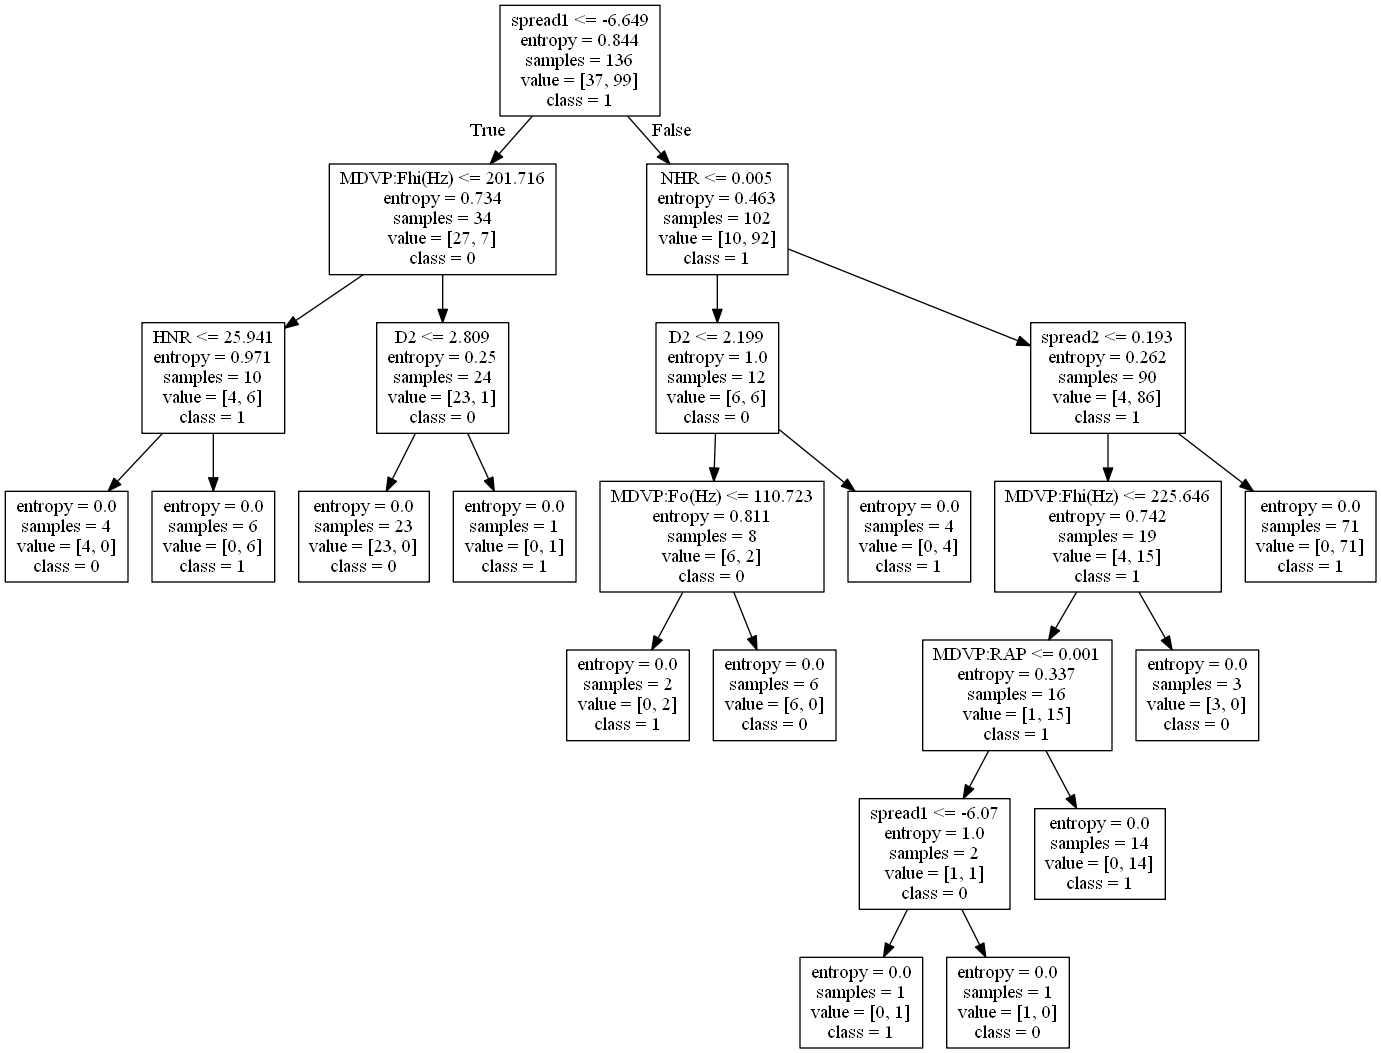

In [147]:
dot_data = tree.export_graphviz(DT_model, out_file= "tree.dot" , feature_names = list(X_train), class_names = list(train_char_label))
system("dot -Tpng tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [120]:
#7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. 
#What is the impact on the model accuracy? How does regularization help? (20 points) 

In [121]:
DT_model_regularized = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [148]:
DTreeActions(DT_model_regularized)

model score : 0.8983050847457628
cross
Predicted  0   1  All
Actual               
0          6   5   11
1          1  47   48
All        7  52   59
Feature importances : 
                       Imp
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.168373
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.030423
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.160472
HNR               0.126155
RPDE              0.024788
DFA               0.000000
spread1           0.400643
spread2           0.089147
D2                0.000000
PPE               0.000000


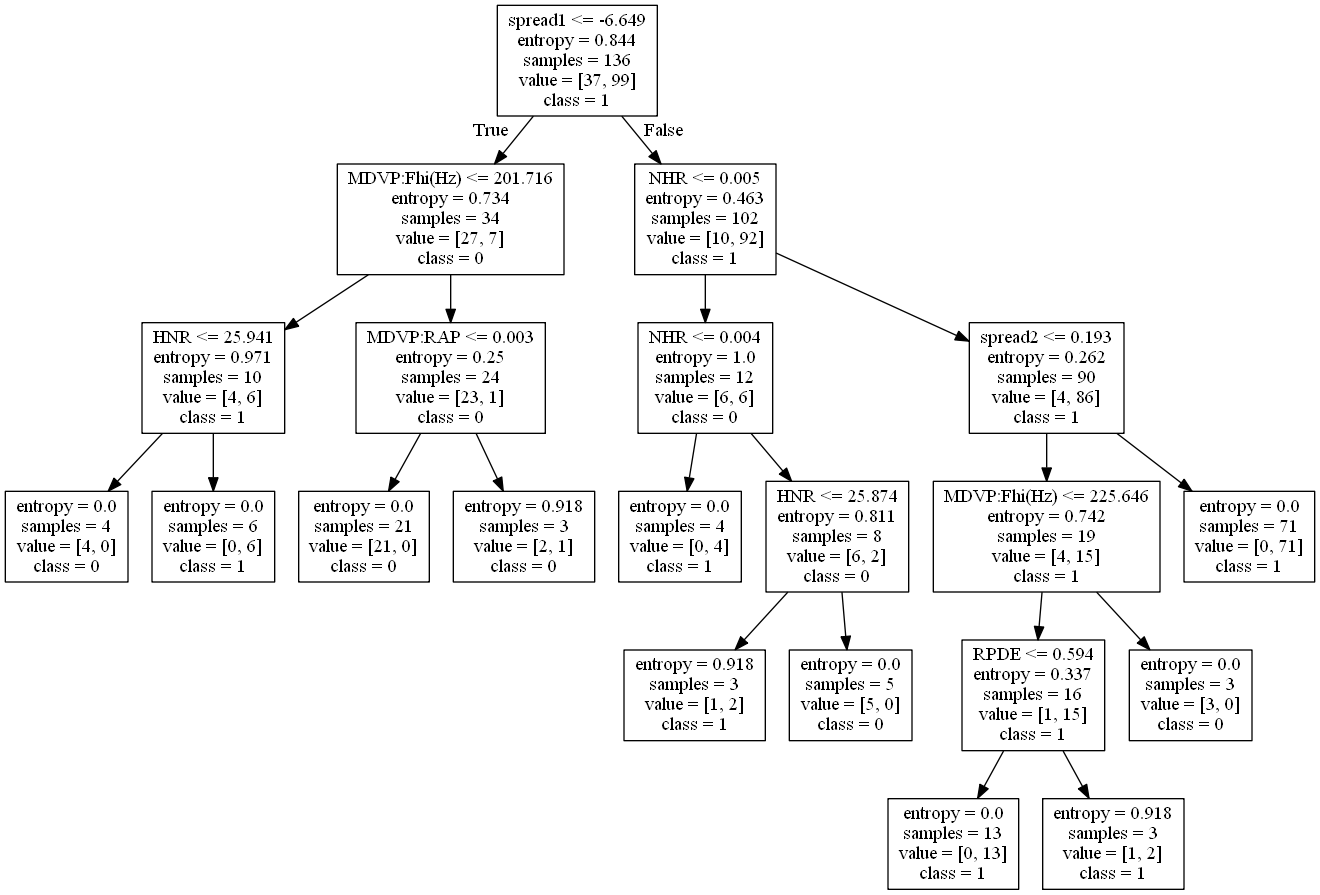

In [149]:
dot_data = tree.export_graphviz(DT_model_regularized, out_file= "tree.dot" , feature_names = list(X_train), class_names = list(train_char_label))
system("dot -Tpng tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [128]:
print("Changing the max_depth to 5 has changed feature importance and also reduced test accuracy")

Changing the max_depth to 5 has changed feature importance and also reduced test accuracy


In [129]:
DT_model_regularized=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)

In [150]:
DTreeActions(DT_model_regularized)

model score : 0.8983050847457628
cross
Predicted  0   1  All
Actual               
0          6   5   11
1          1  47   48
All        7  52   59
Feature importances : 
                       Imp
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.086640
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.024788
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.160472
HNR               0.126155
RPDE              0.000000
DFA               0.000000
spread1           0.400643
spread2           0.089147
D2                0.112156
PPE               0.000000


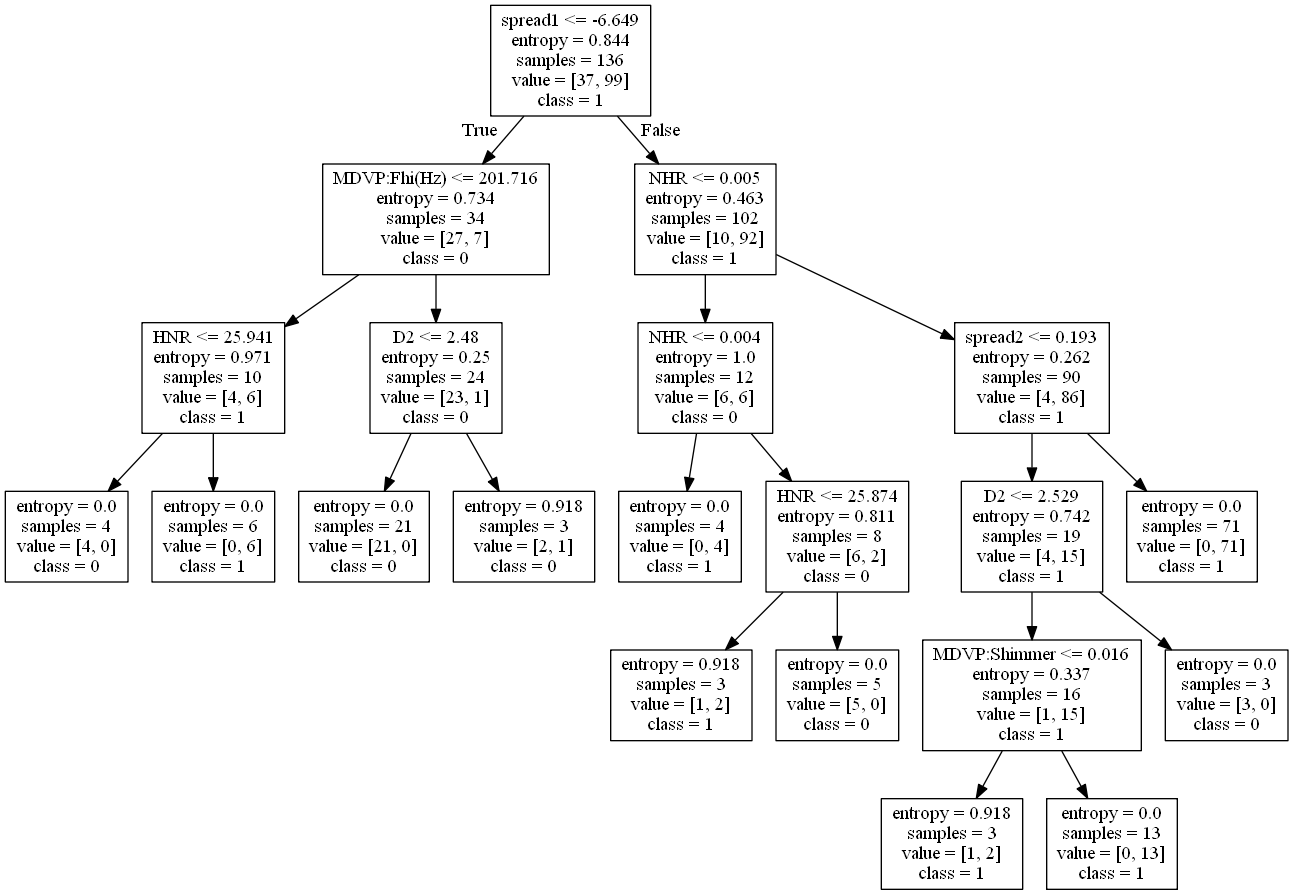

In [151]:
dot_data = tree.export_graphviz(DT_model_regularized, out_file= "tree.dot" , feature_names = list(X_train), class_names = list(train_char_label))
system("dot -Tpng tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [152]:
print("Observing almost same accuracy for leaf sample change. Feature importances change.")

Observing almost same accuracy for leaf sample change. Feature importances change.


In [153]:
#8. Next implement the decision tree using Random Forest.
#What is the optimal number of trees that gives the best result? (10 points)

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rfcl50 = RandomForestClassifier(n_estimators=50)
rfcl100 = RandomForestClassifier(n_estimators=100)
rfcl150 = RandomForestClassifier(n_estimators=150)

In [168]:
print("Estimators = 50 :")
DTreeActions(rfcl50)
print("Estimators = 100 :")
DTreeActions(rfcl100)
print("Estimators = 150 :")
DTreeActions(rfcl150)

Estimators = 50 :
model score : 0.8983050847457628
crosstab confusion matrix : 
Predicted  0   1  All
Actual               
0          6   5   11
1          1  47   48
All        7  52   59
Feature importances : 
                       Imp
MDVP:Fo(Hz)       0.110151
MDVP:Fhi(Hz)      0.052568
MDVP:Flo(Hz)      0.074614
MDVP:Jitter(Abs)  0.022686
MDVP:RAP          0.040334
MDVP:PPQ          0.060566
Jitter:DDP        0.038657
MDVP:Shimmer      0.015258
MDVP:Shimmer(dB)  0.009400
Shimmer:APQ5      0.027901
MDVP:APQ          0.014209
Shimmer:DDA       0.019793
NHR               0.083892
HNR               0.029583
RPDE              0.021550
DFA               0.033645
spread1           0.170076
spread2           0.056491
D2                0.019002
PPE               0.099623
Estimators = 100 :
model score : 0.8983050847457628
crosstab confusion matrix : 
Predicted  0   1  All
Actual               
0          6   5   11
1          1  47   48
All        7  52   59
Feature importances : 
      

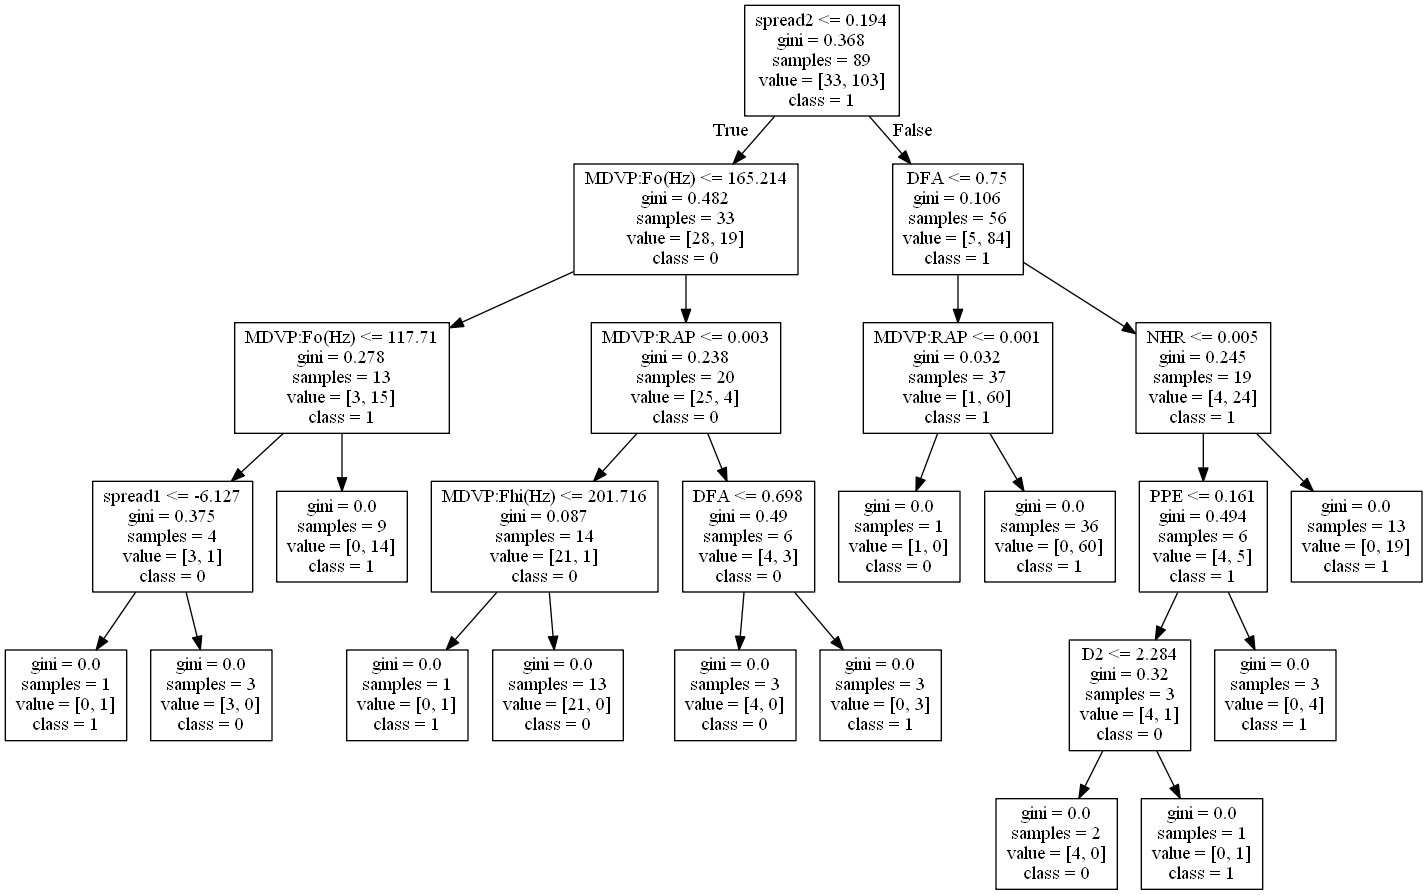

In [169]:
dot_data = tree.export_graphviz(rfcl.estimators_[0], out_file= "tree.dot" , feature_names = list(X_train), class_names = list(train_char_label))
system("dot -Tpng tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [171]:
print("Observing same score for various estimators. Reducing to 5 or 10 was also giving the same.")

Observing same score for various estimators. Reducing to 5 or 10 was also giving the same.
